## 万有引力与行星轨道
根据万有引力（平方反比关系）来模拟行星运行轨道。
- 行星受力：F = k1 / d^2
- 行星加速度：a = F / m = k2 / d^2

在极短时间内：

- 速度变化：v2 - v1 = a * dt
- 位置变化：p2 - p1 = v * dt

In [1]:
import matplotlib.pyplot as plt

## 一些常量

In [2]:
m1 = 1.989e30 #太阳质量, kg
m2 = 5.972e24 #地球质量, kg
d0 = 149597870e3 #日地距离, m
G = 6.67e-11
v0 = 29.8e3 #地球公转速度, m/s
k = G*m1*m2/m2

## 轨道模拟

In [3]:
def status(dt=1):
    global x, y, vx, vy
    dd = x*x + y*y
    d = dd ** 0.5
    a = k / dd
    ax = a * x / d
    ay = a * y / d
    x += vx * dt
    y += vy * dt
    vx -= ax * dt
    vy -= ay * dt
    
def sample(loop, dt=1):
    global xs, ys
    [status(dt) for i in range(loop)]
    xs.append(x)
    ys.append(y)
    
def simulate(count):
    global xs, ys
    (xs, ys) =([], [])
    [sample(1, 3600) for i in range(count)]
    (x1, x2, y1, y2) = (min(xs), max(xs), min(ys), max(ys))
    aspect = (y2 - y1) / (x2 - x1)
    print("Aspect ratio: %.6f" % aspect)
    plt.gca().set_aspect(aspect) # set_aspect('equal')
    plt.plot(xs, ys)
    plt.show()

### 模拟地球真实的状态

Aspect ratio: 0.997769


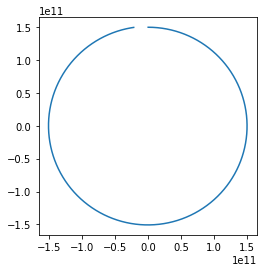

In [10]:
(x, y) = (0, d0)
(vx, vy) = (v0, 0)
simulate(24*360)

### 把公转速度加大一点

Aspect ratio: 0.966961


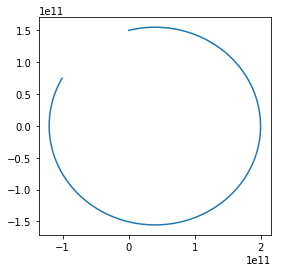

In [8]:
(x, y) = (0, d0)
(vx, vy) = (v0, v0/4)
simulate(24*360)

### 调整一下状态，看能否被俘获

Aspect ratio: 1.033780


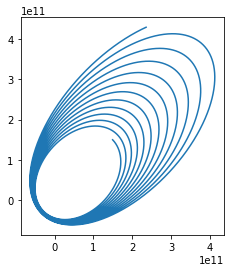

In [14]:
(x, y) = (d0, d0)
(vx, vy) = (v0/3, -v0/3)
simulate(24*6900)